# **Exploratory Data Analysis**

## **Imports and data loading**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset into dataframe
df = pd.read_csv('../data/waze_dataset.csv')

## **Visualizations**

In [91]:
def boxplotter(col, figsize = (5, 2), fliersize = 1):
    plt.figure(figsize=figsize)
    sns.boxplot(x = df[col], fliersize = fliersize)
    plt.tight_layout()
    plt.show()

In [92]:
def histogrammer(col, figsize = (8, 5), discrete = False, bins = 'auto'):
    plt.figure(figsize = figsize)
    sns.histplot(x = df[col], discrete = discrete, bins = bins)
    plt.tight_layout()
    plt.show()

### **`sessions`**

_The number of occurrence of a user opening the app during the month_

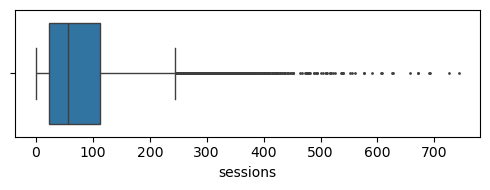

In [93]:
boxplotter('sessions')

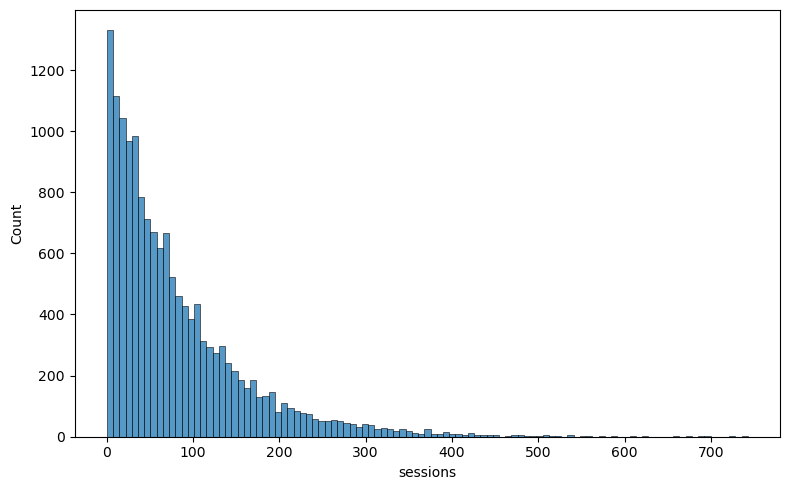

In [94]:
histogrammer('sessions')

### **`drives`**

_An occurrence of driving at least 1 km during the month_

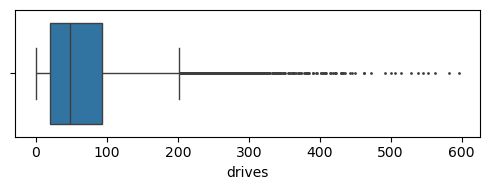

In [95]:
boxplotter('drives')

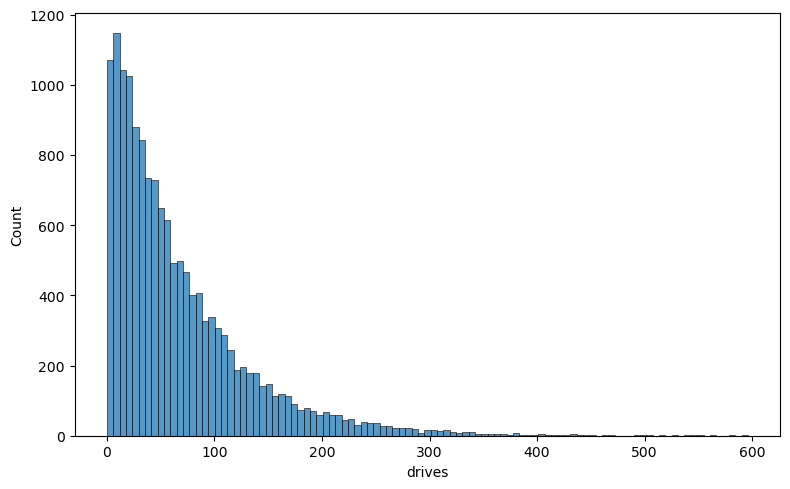

In [96]:
histogrammer('drives')

### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

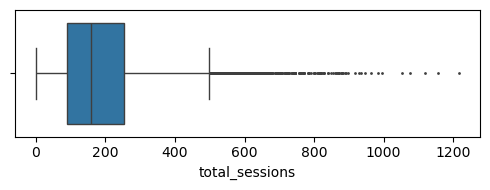

In [97]:
boxplotter('total_sessions')

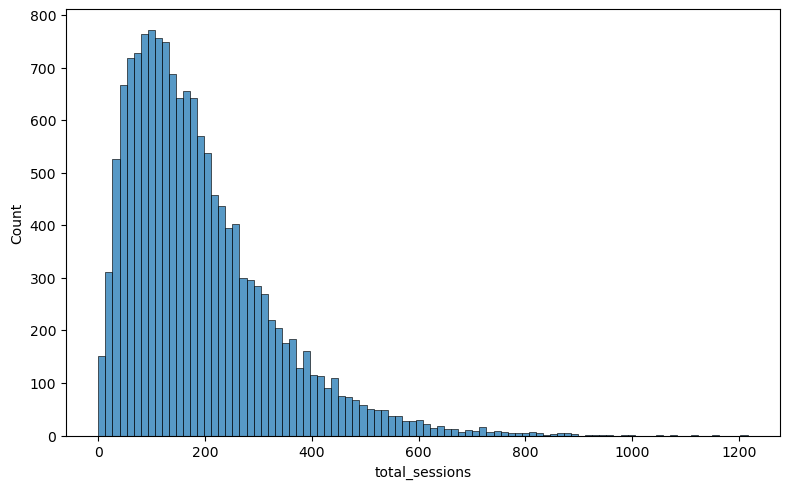

In [98]:
histogrammer('total_sessions')

### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

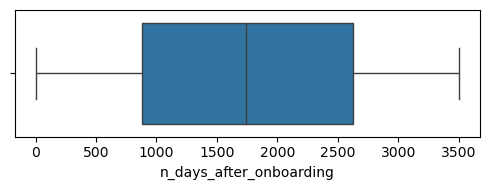

In [99]:
boxplotter('n_days_after_onboarding')

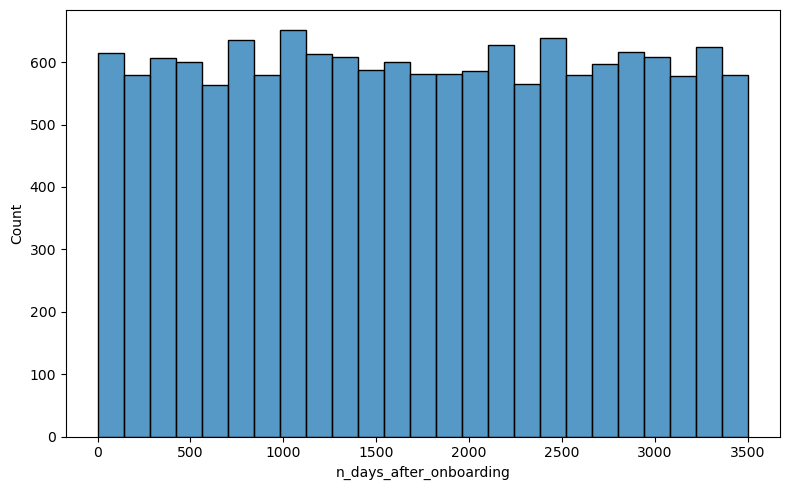

In [100]:
histogrammer('n_days_after_onboarding')

### **`driven_km_drives`**

_Total kilometers driven during the month_

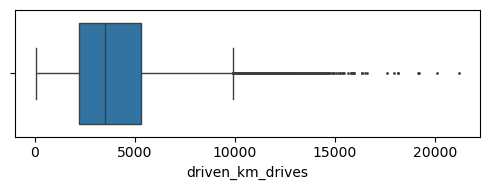

In [101]:
boxplotter('driven_km_drives')

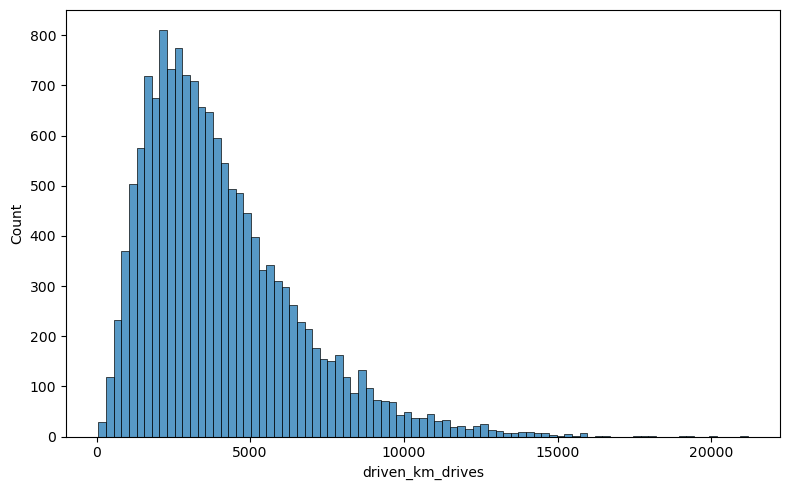

In [102]:
histogrammer('driven_km_drives')

### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

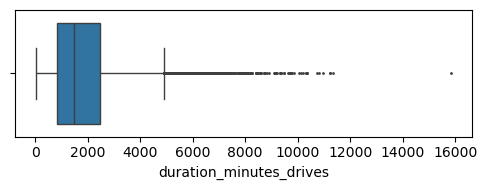

In [103]:
boxplotter('duration_minutes_drives')

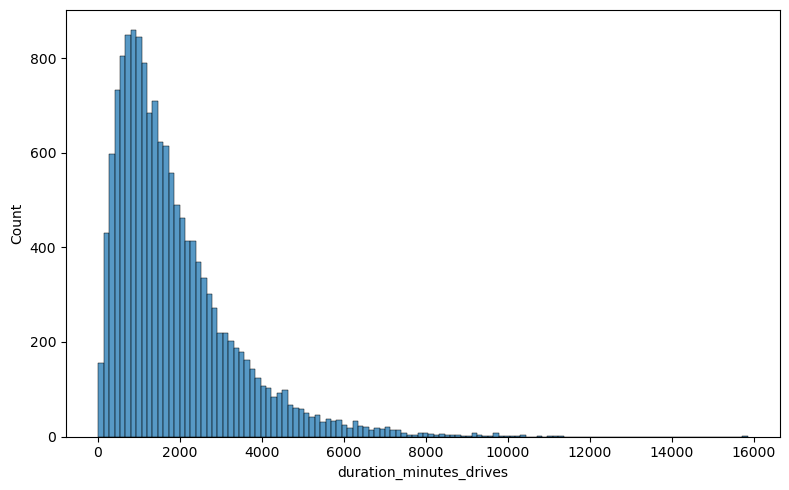

In [104]:
histogrammer('duration_minutes_drives')

### **`activity_days`**

_Number of days the user opens the app during the month_

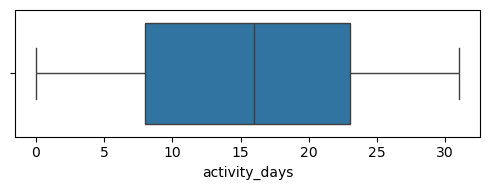

In [105]:
boxplotter('activity_days')

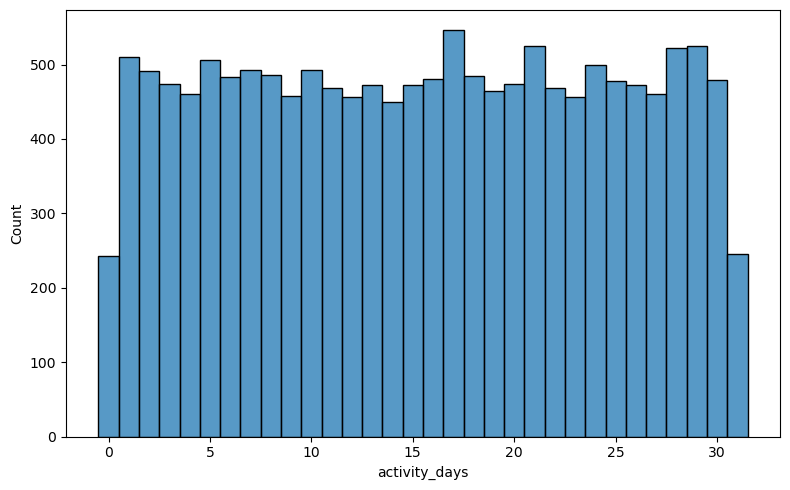

In [106]:
histogrammer('activity_days', discrete = True)

### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

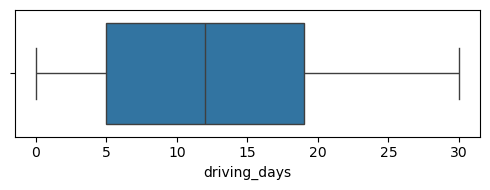

In [107]:
boxplotter('driving_days')

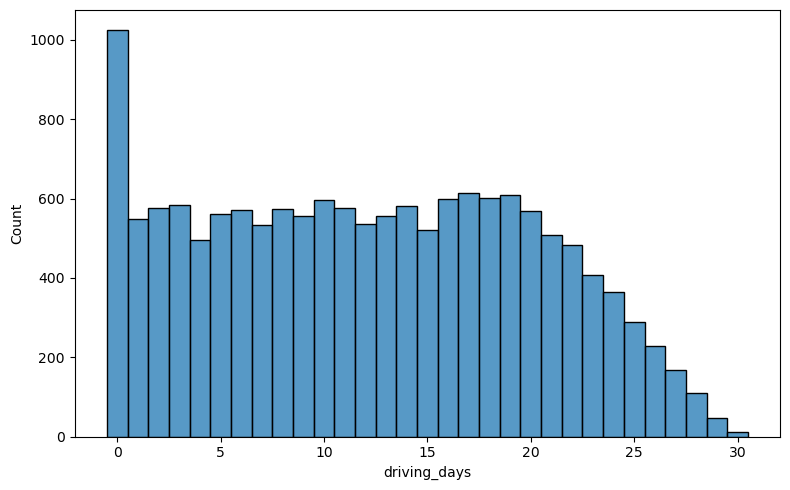

In [108]:
histogrammer('driving_days', discrete = True)

The above variables exhibited histograms that were either right-skewed or uniformly distributed.
Notable patterns and insights were particularly evident in the following variables:
- `total_sessions`: The median values in `sessions` and `total_sessions` were ~ 48 and ~160 respectively. This indicates that majority of users used the app in their last month.
- `activity_days` and `driving_days`: One would expect these two variables share a strong correlation. However, `activity_days` has a uniform distribution, while, `driving_days` has a right skewed one. These discrepancies are apparent at the start and end of the variables respective histograms, where users `activity_days` and `driving_days` do not tally.

### **`device`**

_The type of device a user starts a session with_

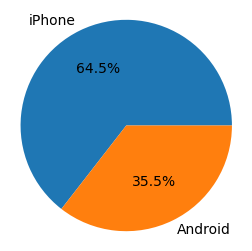

In [109]:
plt.figure(figsize = (3,3))
plt.pie(df['device'].value_counts(), labels = df['device'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal');

There are nearly twice as many iPhone users as Android users represented in this data.

### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

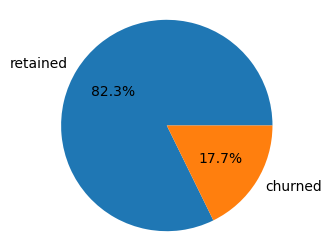

In [110]:
plt.figure(figsize = (3,3))
plt.pie(df['label'].value_counts(), labels = df['label'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal');

Less than 18% of the users churned.

### **`driving_days` vs. `activity_days`**

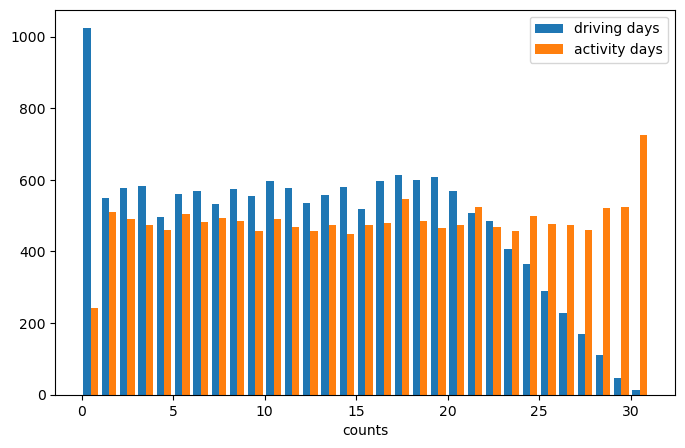

In [115]:
plt.figure(figsize = (8,5))
plt.hist(x = [df['driving_days'], df['activity_days']], bins = 'auto', label = ['driving days', 'activity days'])
plt.xlabel('counts')
plt.legend();

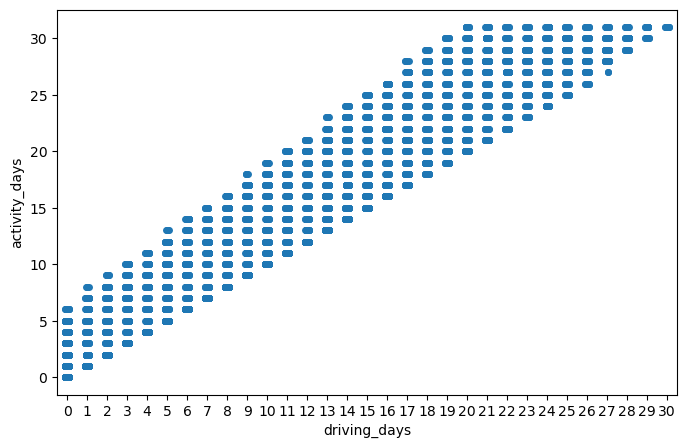

In [114]:
plt.figure(figsize = (8,5))
sns.stripplot(x = df['driving_days'],
              y = df['activity_days']);

The differing maximum values and inconsistencies between `driving_days` and `activity_days` challenge the assumption that these variables are closely aligned. While every driving day is also an activity day, the reverse isn't always true, as users may open the app to check routes or traffic without actually driving. Clarifying this discrepancy with the data team would be important before proceeding with further analysis.

### **Retention by device**

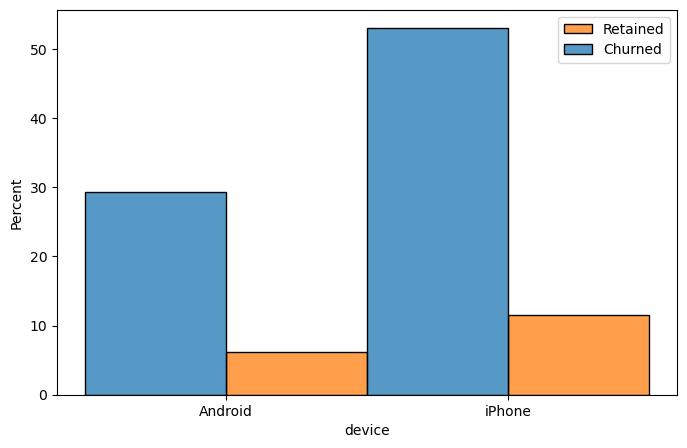

In [122]:
plt.figure(figsize = (8,5))
sns.histplot(x = df['device'], hue = df['label'], multiple = 'dodge', stat = 'percent')
plt.legend(labels=['Retained', 'Churned']);

The proportion of churned users to retained users is consistent between device types.

### **Retention by kilometers driven per driving day**

In [117]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

\\?\C:\Users\Work\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The infinity values are due to there being values of zero in the `driving_days` column, where Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

In [118]:
# Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

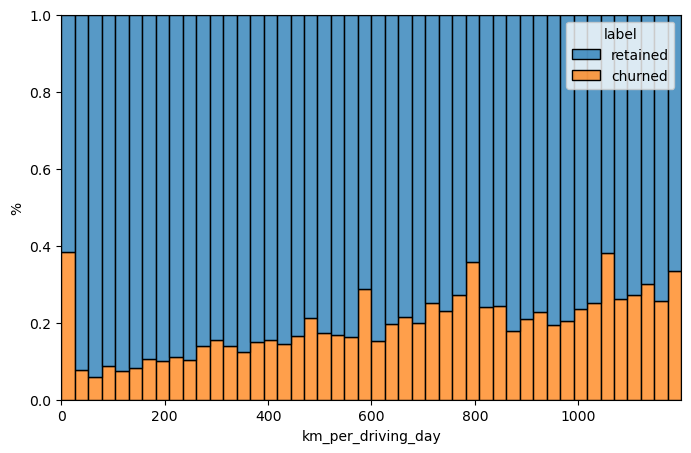

In [121]:
plt.figure(figsize = (8,5))
sns.histplot(x = df[df['km_per_driving_day'] <= 1200]['km_per_driving_day'], hue = df['label'], multiple = 'fill')   
plt.ylabel('%');

### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

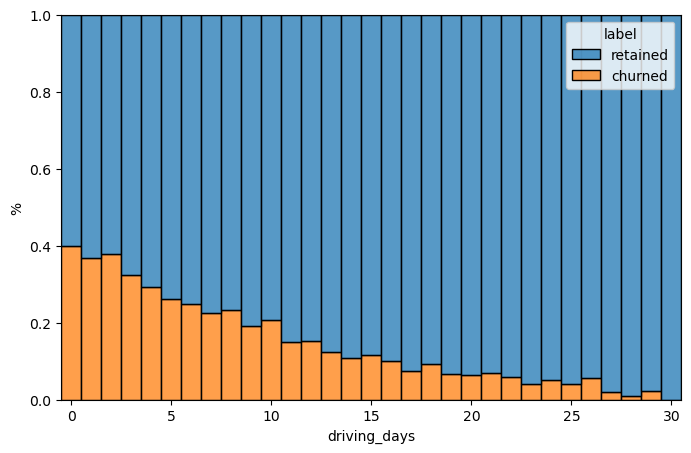

In [120]:
plt.figure(figsize = (8,5))
sns.histplot(x = df['driving_days'], hue = df['label'], bins = 'auto', discrete = True, multiple = 'fill')
plt.ylabel('%');

- Churn is highest (40%) among users with no app usage last month.

- Users with more frequent use are less likely to churn.

- Churn from non-users may stem from past dissatisfaction or reduced need (e.g., better public transit).

- Heavy-user churn would indicate current dissatisfaction, which isn’t observed.

- `km_per_driving_day` positively correlates with churn—users driving more km per day tend to churn more.

- `driving_days` negatively correlates with churn—users driving on more days tend to churn less.

### **Proportion of sessions that occurred in the last month**

In [123]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions'] * 100

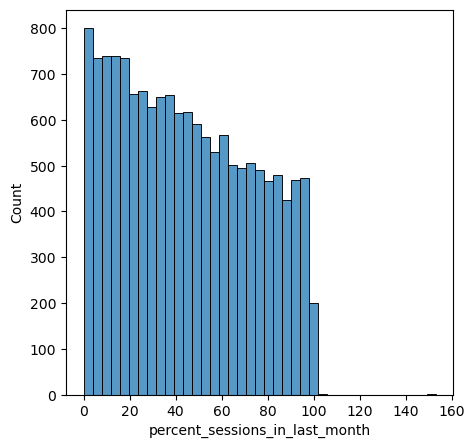

In [38]:
plt.figure(figsize = (5,5))
sns.histplot(x = df['percent_sessions_in_last_month']);

In [126]:
print(float(df['percent_sessions_in_last_month'].median()))
print(float(df['n_days_after_onboarding'].median()))

42.30970299276318
1741.0


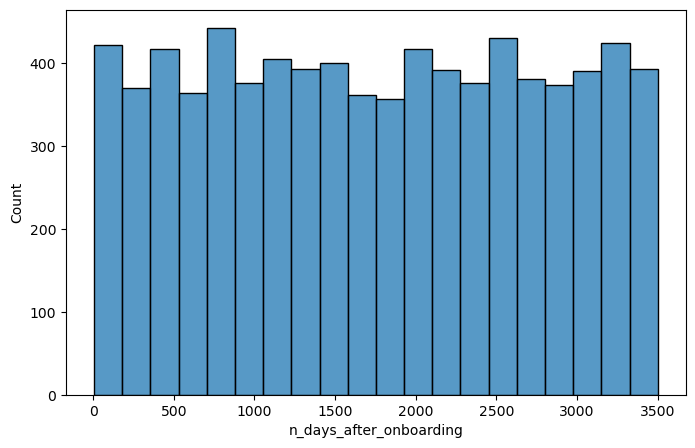

In [131]:
plt.figure(figsize = (8,5))
sns.histplot(x = df[df['percent_sessions_in_last_month'] >= 40]['n_days_after_onboarding']);

- Half of users had ≥40% of sessions in the last month despite a median onboarding time of ~5 years.

- Days since onboarding for these users are uniformly distributed.

- This unusual spike in recent usage among long-term users warrants further investigation.

## **Handling outliers**

In [128]:
def impute_outliers(column_name):
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    percentile_95 = df[column_name].quantile(0.95)
    df.loc[df[column_name] > percentile_95, column_name] = percentile_95

In [129]:
impute_outliers('sessions')
impute_outliers('drives')
impute_outliers('total_sessions')
impute_outliers('driven_km_drives')
impute_outliers('duration_minutes_drives')

In [130]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,44.925534
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,28.691863
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,19.622145
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,42.309703
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,68.721626
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,153.063707
